In [1]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt
import  photutils as ph
from astropy.stats import sigma_clipped_stats
from astropy.stats import sigma_clip

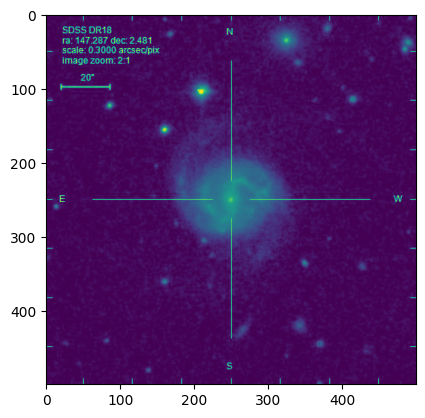

In [2]:
#Open image and convert it to numpy array
img=pil.Image.open("/home/kevin/aufklarung_astro_station/project2/images/image_147.28652ra_2.4808198dec_GALAXY_540602138078767104specObjID_SDSS_dr18.jpg")
img_array=np.array(img)
img_array.shape
img_array=img_array[:,:,1]
plt.imshow(img_array)

In [38]:
#Make aperture aroud the galaxy and another outer aperture for the noise determination

from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAnnulus

#Position of the galaxy
positions = [(250,250)]
#Make aperture with some radius in pixels
aperture= CircularAperture(positions, r=70)
#Make outer aperture called annulus for noise determination
annulus = CircularAnnulus(positions, r_in=75, r_out=120)
#Perform aperture photometry only with aperture and not annulus
phot_table = aperture_photometry(img_array, aperture)

In [39]:
phot_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,250.0,250.0,1155949.246292689


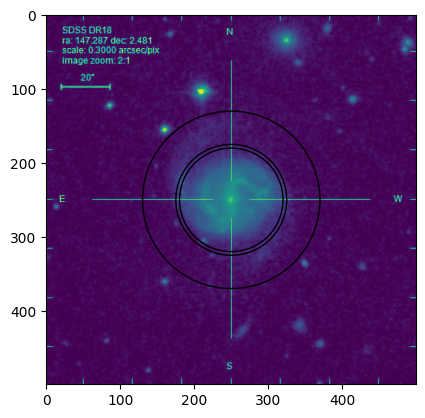

In [40]:
#Display the apertures and annulus
plt.imshow(img_array)
aperture.plot()
annulus.plot()

In [41]:
#Do mean background subtraction from the aperture
from photutils.aperture import ApertureStats
#On the outer annulus aperture perform mean median finding
aperturestats= ApertureStats(img_array, annulus)
bkg_mean= aperturestats.mean
#Find the area of the galaxy aperture
aperture_area = aperture.area_overlap(img_array)
#Estimate total background noise within the aperture
total_bkg= bkg_mean*aperture_area
#Subtract the background and attach the subtracted in the table
phot_bkgsub = phot_table['aperture_sum'] - total_bkg
phot_table["bkg_sub_aperture_sum"]=phot_bkgsub

In [42]:
#Table with background subtracted aperture photometry
phot_table

id,xcenter,ycenter,aperture_sum,bkg_sub_aperture_sum
,pix,pix,,
int64,float64,float64,float64,float64
1,250.0,250.0,1155949.246292689,948969.3663724905
